Copyright (C)
2016 - 2019 Pinard Liu(liujianping-ok@163.com)

https://www.cnblogs.com/pinard

Permission given to modify the code as long as you keep this declaration at the top

支持向量机高斯核调参小结 https://www.cnblogs.com/pinard/p/6126077.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification
%matplotlib inline

In [2]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1);
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

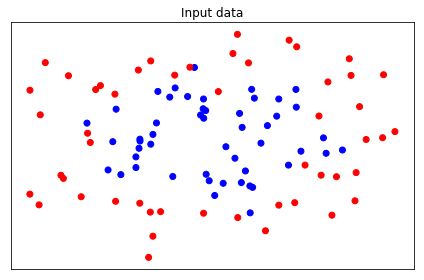

In [3]:
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot()

ax.set_title("Input data")
# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid={"C":[0.1, 1, 10], "gamma": [1, 0.1, 0.01]}, cv=4)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1} with a score of 0.91


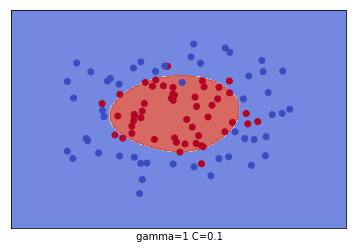

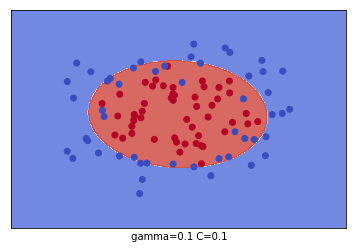

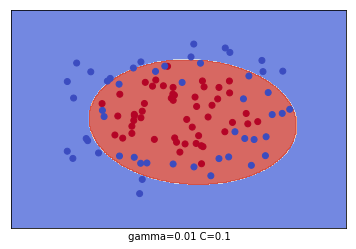

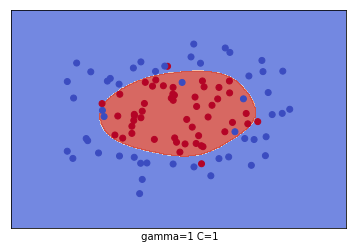

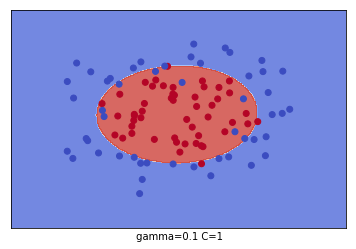

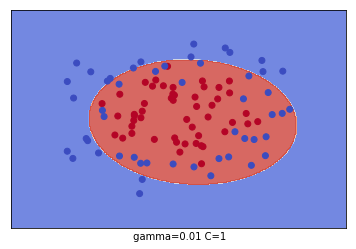

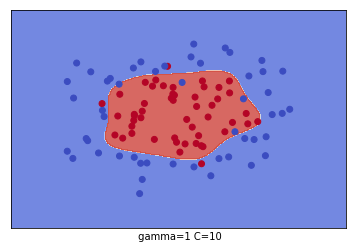

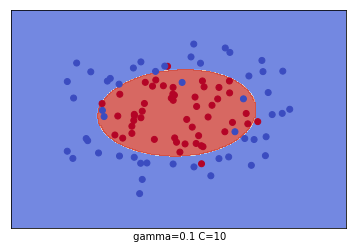

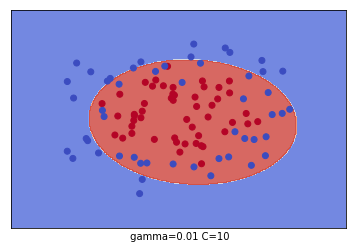

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.02),
                     np.arange(y_min, y_max, 0.02))

for i, C in enumerate((0.1, 1, 10)):
    for j, gamma in enumerate((1, 0.1, 0.01)):
        plt.subplot()       
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(" gamma=" + str(gamma) + " C=" + str(C))
        plt.show()